In [1]:
import scanpy as sc

In [9]:
outdir = "temp/"

In [ ]:
# !wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
# tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz

In [3]:
adata = sc.read_10x_mtx(outdir + "/pbmc3k/filtered_gene_bc_matrices/hg19")
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [4]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
adata.layers["ncounts"] = adata.X.copy()
sc.pp.log1p(adata)

In [5]:
sc.tl.pca(adata, random_state=0)
sc.pp.neighbors(adata, random_state=0)
sc.tl.umap(adata, random_state=0)
sc.tl.tsne(adata, random_state=0)
sc.tl.leiden(adata, resolution=0.5, random_state=0)

/tmp/ipykernel_1972824/2083136543.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5, random_state=0)


In [6]:
adata.obs["cell_type"] = None
annotation = {
    "0": "CD4 T",
    "1": "CD4 T",
    "2": "Monocytes",
    "3": "B",
    "4": "CD8 T",
    "5": "NK",
    "6": "Monocytes",
    "7": "DC",
}

adata.obs["cell_type"] = adata.obs["leiden"].map(annotation)

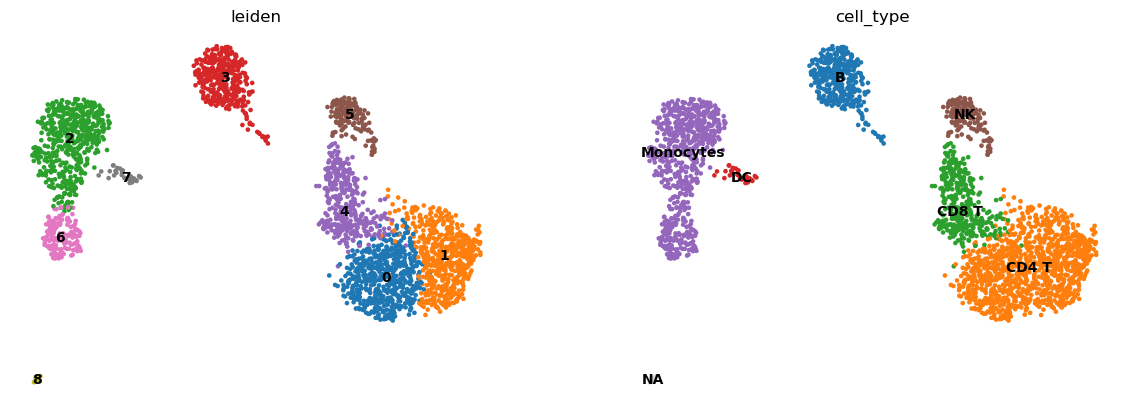

In [7]:
sc.pl.umap(adata, color=["leiden", "cell_type"], frameon=False, layer="counts", legend_loc="on data")

In [12]:
adata.write_h5ad(outdir + "pbmc3k_analysed.h5ad")

In [13]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'leiden', 'cell_type'
    var: 'gene_ids'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'tsne', 'leiden', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    layers: 'counts', 'ncounts'
    obsp: 'distances', 'connectivities'